# Credit EDA Case Study : Souvik, Megha

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#reading application_data.csv
app = pd.read_csv("application_data.csv")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
#feel of the data
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## 1. Data Analysis

In [5]:
app.shape

(307511, 122)

In [6]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
#checking datatypes
app.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


#### 1.1 Handling Nulls - Removing unwanted columns

In [8]:
#checking percentage of null values in all columns
app_nulls = app.isnull().sum() * 100/len(app)

#Number of columns having null values
len(app_nulls[app_nulls.values>0])

67

In [9]:
app_nulls[app_nulls.values>0]

AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
OWN_CAR_AGE                     65.990810
OCCUPATION_TYPE                 31.345545
CNT_FAM_MEMBERS                  0.000650
EXT_SOURCE_1                    56.381073
EXT_SOURCE_2                     0.214626
EXT_SOURCE_3                    19.825307
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50

In [10]:
print('Least % of null values in the data set: ', min(app_nulls.values))
print('Most % of null values in the data set: ', max(app_nulls.values))

Least % of null values in the data set:  0.0
Most % of null values in the data set:  69.87229725115525


There are **67** columns in the dataset containing null values.

Market standard says most of the times we can drop columns with more than 25-30% missing data, of course with many exceptions as per the use case.

Also, **Occupation Type** lies in the border line with 31% null values. But, we believe Occupation Type plays a significant role to find whether the person will default or not. Hence we are deciding to drop columns columns with more than 40% of missing values (Since there's no column with null value percentages between 31-40%)

In [11]:
app_nulls = app_nulls[app_nulls.values > 40]
len(app_nulls)

49

We have a total of 49 columns with more than 40% null values and insignificant to our analysis.

In [12]:
#Removing columns with more than 40 percent null values in the dataset
app.drop(app_nulls.index, axis=1, inplace = True)
app.shape

(307511, 73)

In [13]:
app.isnull().sum()[app.isnull().sum()>0]

AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
EXT_SOURCE_2                    660
EXT_SOURCE_3                  60965
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

All the columns except AMT_ANNUITY, AMT_GOODS_PRICE, CNT_FAM_MEMBERS, OCCUPATION_TYPE and NAME_TYPE_SUITE seems insignificant. Hence dropping them.

In [14]:
app_nulls=list(app.isnull().sum()[app.isnull().sum()>600].index)
app_nulls

['NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [15]:
#removing NAME_TYPE_SUITE, OCCUPATION_TYPE and adding DAYS_LAST_PHONE_CHANGE
app_nulls.remove('NAME_TYPE_SUITE')
app_nulls.remove('OCCUPATION_TYPE')
app_nulls.append('DAYS_LAST_PHONE_CHANGE')

In [16]:
app.drop(labels=app_nulls,axis=1,inplace=True)
app.isnull().sum()[app.isnull().sum()>0]

AMT_ANNUITY           12
AMT_GOODS_PRICE      278
NAME_TYPE_SUITE     1292
OCCUPATION_TYPE    96391
CNT_FAM_MEMBERS        2
dtype: int64

On further analysis, we can observe there are columns with values of 0/1 or N/Y. 
On examining those columns, they won't be of any significance further in our analysis. Dropping the Flag columns.

In [17]:
#Fetch all indicator FLAG columns
flag_col = app.filter(regex='^FLAG',axis=1).columns.tolist()

flag_col

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

Here other than FLAG_OWN_CAR and FLAG_OWN_REALTY all other columns seems insignificant further for analysis. Hence dropping all other columns from flag_col except FLAG_OWN_CAR and FLAG_OWN_REALTY.

In [18]:
flag_col.remove('FLAG_OWN_CAR')
flag_col.remove('FLAG_OWN_REALTY')

In [19]:
#Delete all indicator FLAG columns as they are not relevant to our analysis
app.drop(flag_col, axis = 1, inplace = True)

In [20]:
app.shape

(307511, 34)

#### 1.2 Handling Nulls - Filling in appropriate values for analysis

In [21]:
app.isnull().sum()[app.isnull().sum() > 0]

AMT_ANNUITY           12
AMT_GOODS_PRICE      278
NAME_TYPE_SUITE     1292
OCCUPATION_TYPE    96391
CNT_FAM_MEMBERS        2
dtype: int64

In [22]:
#calculating mean, median and mode for AMT_ANNUITY and AMT_GOODS_PRICE
print("AMT_ANNUITY")
print('Mean: ', app['AMT_ANNUITY'].mean())
print('Median: ', app['AMT_ANNUITY'].median())
print('Mode: ', app['AMT_ANNUITY'].mode())

print("----------------------------------")
print("AMT_GOODS_PRICE")
print('Mean: ', app['AMT_GOODS_PRICE'].mean())
print('Median: ', app['AMT_GOODS_PRICE'].median())
print('Mode: ', app['AMT_GOODS_PRICE'].mode())

AMT_ANNUITY
Mean:  27108.573909183444
Median:  24903.0
Mode:  0    9000.0
dtype: float64
----------------------------------
AMT_GOODS_PRICE
Mean:  538396.2074288895
Median:  450000.0
Mode:  0    450000.0
dtype: float64


In [23]:
app[app['AMT_ANNUITY'].isnull()].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,450000.0,Unaccompanied,Commercial associate,Incomplete higher,Single / not married,House / apartment,0.026392,-10668,-2523,-4946.0,-3238,High skill tech staff,1.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,450000.0,Unaccompanied,Working,Lower secondary,Civil marriage,House / apartment,0.035792,-9027,-1270,-3640.0,-741,Laborers,2.0,2,2,MONDAY,20,0,0,0,0,0,0,Business Entity Type 1
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.046220,-17376,-3950,-11524.0,-831,Cooking staff,2.0,1,1,WEDNESDAY,15,0,0,0,1,1,1,Self-employed
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,225000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.035792,-11329,-2040,-3195.0,-3069,Core staff,2.0,2,2,FRIDAY,13,0,0,0,1,1,1,Government
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,360000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.046220,-19762,-2498,-11285.0,-3305,Laborers,1.0,1,1,FRIDAY,15,0,1,1,0,1,1,Other


Looking at the AMT_CREDIT for rows with AMT_ANNUITY null values, replacing null values with mode doesn't seem to be a good idea. Hence replacing the null values with median.

In [24]:
app['AMT_ANNUITY'].fillna(app['AMT_ANNUITY'].median(), inplace=True)

Imputing AMT_GOODS_PRICE

In [25]:
app.AMT_GOODS_PRICE.value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
180000.0     10123
454500.0      9157
1125000.0     9050
135000.0      8206
315000.0      5225
1350000.0     5037
679500.0      4824
238500.0      4696
360000.0      4553
247500.0      4318
463500.0      3873
540000.0      3763
495000.0      3463
202500.0      3222
90000.0       3169
405000.0      2954
472500.0      2828
157500.0      2704
585000.0      2647
337500.0      2501
229500.0      2438
112500.0      2170
630000.0      2164
1800000.0     2146
720000.0      1922
1575000.0     1875
688500.0      1824
292500.0      1708
148500.0      1674
477000.0      1611
810000.0      1568
67500.0       1505
697500.0      1408
382500.0      1396
765000.0      1396
904500.0      1375
283500.0      1372
252000.0      1368
234000.0      1279
45000.0       1169
945000.0      1161
855000.0      1113
1129500.0     1109
913500.0      1065
328500.0      1059
459000.0      1023
193500.0      1007
103500.0    

In [26]:
#Since median and mode both is 450000.0 and it has the highest counts as well imputing again with 450000 might lead to incorrect
#analysis. Hence imputing it with mean.
app['AMT_GOODS_PRICE'].fillna(app['AMT_GOODS_PRICE'].mean(), inplace=True)

The column OCCUPATION_TYPE with 96391 null values needs to be imputed.

In [27]:
app.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

Null values for OCCUPATION_TYPE to be replaced by 'Not Specified'

In [28]:
app['OCCUPATION_TYPE'].fillna('Not Specified', inplace = True)

The column NAME_TYPE_SUITE needs to be imputed

In [29]:
app.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [30]:
app['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace=True)

Since CNT_FAM_MEMBERS cannot be a fraction, replacing null values by median. 

In [31]:
app['CNT_FAM_MEMBERS'].fillna(app['CNT_FAM_MEMBERS'].median(), inplace=True)

#### 1.3 Correcting Datatypes

In [32]:
app.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
WEEKDAY_APPR_PROCESS_STAR

In [33]:
app.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3


In [34]:
#CNT_FAM_MEMBERS cannot be float. Converting to integer
app.CNT_FAM_MEMBERS = app.CNT_FAM_MEMBERS.apply(lambda x: int(x))

In [35]:
#DAYS_EMPLOYED, DAY_REGISTRATION, DAYS_ID_PUBLISH should be a positive value. Converting into absolute value
app.DAYS_EMPLOYED = app.DAYS_EMPLOYED.apply(lambda x: abs(x))
app.DAY_REGISTRATION = app.DAYS_REGISTRATION.apply(lambda x: abs(x))
app.DAYS_ID_PUBLISH = app.DAYS_ID_PUBLISH.apply(lambda x: abs(x))

#### 1.4 Categorizing continuous variables into discrete intervals - Binning

We have DAYS_BIRTH column which can used to derive the age of the customer.

In [36]:
#Dividing by -365.25 to include leap years
app['Age'] = app['DAYS_BIRTH'] //-365.25

In [37]:
app.drop('DAYS_BIRTH', axis = 1, inplace = True)

Binning Age

In [38]:
app.Age.describe()

count    307511.000000
mean         43.405137
std          11.945779
min          20.000000
25%          33.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: Age, dtype: float64

In [39]:
#Minimum age is 20 years and maximum is 69 - so dividing into 6 intervals
app['AgeGroup'] = pd.cut(app['Age'], bins=np.linspace(20, 70, 6))

In [40]:
app['AgeGroup'].value_counts()

(30.0, 40.0]    83212
(40.0, 50.0]    74347
(50.0, 60.0]    67864
(20.0, 30.0]    52963
(60.0, 70.0]    29124
Name: AgeGroup, dtype: int64

Binning AMT_INCOME_TOTAL

In [41]:
app.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [42]:
#app['IncomeRange'] = pd.qcut(app['AMT_INCOME_TOTAL'], q=[0,0.25,0.50,0.90,1], labels=['Low','Average','High','Very High'])

### 1.5 Checking for Outliers - need to add reasons / need to verify 

To check outliers firstly we will have to divide the columns into 2 sections-Numerical columns and categorical columns.

In [44]:
numeric_data=app.select_dtypes(include=np.number)
numeric_cols=numeric_data.columns

numeric_data.head(2)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,Age
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,637,-3648.0,2120,1,2,2,10,0,0,0,0,0,0,25
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,1188,-1186.0,291,2,1,1,11,0,0,0,0,0,0,45


In [45]:
categoric_data=app.select_dtypes(exclude=np.number)
categoric_cols=categoric_data.columns

categoric_data.head(2)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,AgeGroup
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,"(20.0, 30.0]"
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,"(40.0, 50.0]"


In [46]:
print('App data: ', app.shape)
print('Numeric data: ', numeric_data.shape)
print('Categoric data: ', categoric_data.shape)

App data:  (307511, 35)
Numeric data:  (307511, 22)
Categoric data:  (307511, 13)


None of the columns are missed during segregation.

In [47]:
numeric_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,Age
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383962e+05,0.020868,67724.742149,-4986.120328,2994.202373,2.152664,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,43.405137
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692794e+05,0.013831,139443.751806,3522.886321,1509.450419,0.910679,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,11.945779
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,0.000000,-24672.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,933.000000,-7479.500000,1720.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,2219.000000,-4504.000000,3254.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,5707.000000,-2010.000000,4299.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,365243.000000,0.000000,7197.000000,20.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,69.000000


#### <FONT COLOR='BROWN'> CNT_CHILDREN</FONT>

Checking for outliers in numeric fields where there is a significant difference in the min and max values.

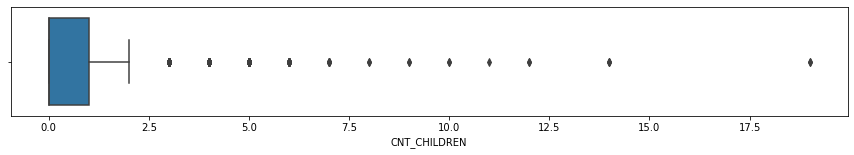

In [48]:
plt.figure(figsize = (15,2))
sns.boxplot(numeric_data.CNT_CHILDREN)
plt.show()

In [49]:
#The data outside the 100th percent percentile is not continuous.
print(numeric_data.CNT_CHILDREN.quantile(0.99))
print('Number of values with rows more than 99 percentile:' ,len(numeric_data[numeric_data.CNT_CHILDREN>3]))

3.0
Number of values with rows more than 99 percentile: 555


In [50]:
numeric_data[numeric_data.CNT_CHILDREN>3].CNT_CHILDREN.quantile([0.25,0.50,0.75,0.99])

0.25     4.0
0.50     4.0
0.75     4.0
0.99    12.0
Name: CNT_CHILDREN, dtype: float64

In [51]:
#Since the difference between 75th and 99th percentile of data with number of children > 3 is huge, lets change above 
#this 75h percentile. Also in India more than 4 children is rare.
app.loc[app['CNT_CHILDREN'] > 4, ['CNT_CHILDREN']] = 5

All the rows with cnt_children > 5 are 5 or more.

#### <FONT COLOR='BROWN'> AMT_INCOME_TOTAL</FONT>

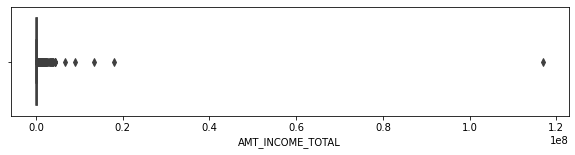

In [52]:
plt.figure(figsize = (10,2))
sns.boxplot(app.AMT_INCOME_TOTAL)
plt.show()

In [53]:
app.AMT_INCOME_TOTAL.quantile(0.99)

472500.0

In [54]:
app[app.AMT_INCOME_TOTAL>app.AMT_INCOME_TOTAL.quantile(0.99)].sort_values(by='AMT_INCOME_TOTAL', ascending=False).head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,Age,AgeGroup
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,922,-6762.0,3643,Laborers,3,2,2,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 3,34,"(30.0, 40.0]"
203693,336147,0,Cash loans,M,Y,Y,2,18000090.0,675000.0,69295.5,675000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.030755,4961,-3338.0,4728,Not Specified,4,2,2,THURSDAY,22,0,0,0,0,0,0,Business Entity Type 3,42,"(40.0, 50.0]"
246858,385674,0,Cash loans,M,Y,Y,0,13500000.0,1400503.5,130945.5,1368000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.030755,280,-3953.0,4972,Not Specified,2,2,2,SUNDAY,12,0,0,0,0,0,0,Business Entity Type 3,37,"(30.0, 40.0]"
77768,190160,0,Cash loans,F,Y,N,0,9000000.0,1431531.0,132601.5,1377000.0,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,0.010147,8476,-7276.0,1656,Managers,2,2,2,FRIDAY,13,0,0,0,0,0,0,Business Entity Type 1,44,"(40.0, 50.0]"
131127,252084,0,Cash loans,M,Y,N,0,6750000.0,790830.0,52978.5,675000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.009549,443,-7414.0,2886,Laborers,2,2,2,TUESDAY,14,0,1,1,0,1,1,Transport: type 4,52,"(50.0, 60.0]"
204564,337151,0,Cash loans,M,N,N,0,4500000.0,450000.0,47749.5,450000.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,0.009334,8472,-1179.0,1997,Managers,1,2,2,TUESDAY,12,0,0,0,0,0,0,Military,50,"(40.0, 50.0]"
103006,219563,0,Revolving loans,M,Y,Y,0,4500000.0,2250000.0,225000.0,2250000.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,0.007330,378,-4919.0,3441,Managers,1,2,2,SATURDAY,15,0,1,1,0,0,0,Construction,29,"(20.0, 30.0]"
187833,317748,0,Cash loans,M,N,N,0,4500000.0,835380.0,42651.0,675000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.006008,3331,-8877.0,2104,Laborers,2,2,2,FRIDAY,13,1,1,0,1,1,0,Construction,51,"(50.0, 60.0]"
287463,432980,0,Cash loans,M,Y,Y,0,4500000.0,1755000.0,61132.5,1755000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.010032,3618,-9447.0,2315,Managers,2,2,2,SATURDAY,2,0,0,0,0,0,0,Self-employed,51,"(50.0, 60.0]"
181698,310601,0,Cash loans,M,Y,Y,1,3950059.5,675000.0,66217.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,With parents,0.032561,3163,-10078.0,683,Managers,3,1,1,MONDAY,14,0,0,0,0,0,0,Trade: type 2,28,"(20.0, 30.0]"


In [55]:
#There is a lot of difference between the 99th precentile and maximum value. Hence detecting Outlier by the IQR formula
iqr=app.AMT_INCOME_TOTAL.quantile(0.75)-app.AMT_INCOME_TOTAL.quantile(0.25)
AMT_INCOME_TOTAL_OUTLIER=app.AMT_INCOME_TOTAL.quantile(0.75)+(iqr*1.5)
AMT_INCOME_TOTAL_OUTLIER

337500.0

In [56]:
print(len(app[app.AMT_INCOME_TOTAL>AMT_INCOME_TOTAL_OUTLIER]))
print(len(app[app.AMT_INCOME_TOTAL>app.AMT_INCOME_TOTAL.quantile(0.99)]))

14035
3014


Since AMT_INCOME_TOTAL outlier is 337500 and 99th percentile is 472500 and the number of rows with these values are 14035 and 3014 respectively. Meaning income from 337500.0 to 472500.0 is still a norm but anything above 472500.0 will lead to a bias in average of the income. Hence replacing the values higher than 472500.0 with 472500.0+10000.0 to mske it continuous and distinctly identifiable and not 337500.0 since 99th percentile value is higher.

In [57]:
app.loc[app['AMT_INCOME_TOTAL'] > 472500.0, ['AMT_INCOME_TOTAL']] = 472500.0+10000.0

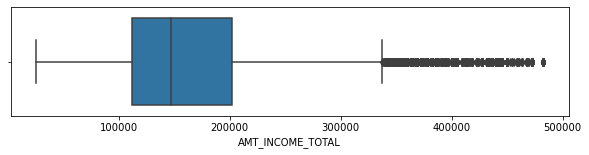

In [58]:
plt.figure(figsize = (10,2))
sns.boxplot(app.AMT_INCOME_TOTAL)
plt.show()

In [59]:
app['IncomeRange'] = pd.qcut(app['AMT_INCOME_TOTAL'], q=[0,0.25,0.50,0.90,1], labels=['Low','Average','High','Very High'])

In [60]:
app.IncomeRange.head()

0       High
1       High
2        Low
3    Average
4    Average
Name: IncomeRange, dtype: category
Categories (4, object): [Low < Average < High < Very High]

#### <FONT COLOR='BROWN'> AMT_CREDIT</FONT>

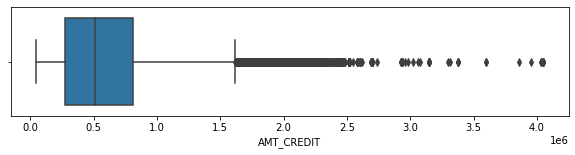

In [61]:
plt.figure(figsize = (10,2))
sns.boxplot(app.AMT_CREDIT)
plt.show()

In [62]:
#Calculating outlier
iqr==app.AMT_CREDIT.quantile(0.75)-app.AMT_CREDIT.quantile(0.25)
AMT_CREDIT_OUTLIER=app.AMT_CREDIT.quantile(0.75)+(iqr*1.5)
AMT_CREDIT_OUTLIER

943650.0

Outlier is more than 75th percentile.

In [64]:
app.AMT_CREDIT.quantile(0.99)

1854000.0

Outlier is much lower than the 99th percentile value and 99th percentile value is much lower than the maximum value.
Hence replacing values more than 99th percentile with 1854000.0+ 10000.0

In [ ]:
#In order to read data better, reducing outliers by considering upto 99th percentile of the total data

app = app[app['AMT_CREDIT'] < app['AMT_CREDIT'].quantile(0.99)]
sns.boxplot(app['AMT_CREDIT'])
plt.show()

In [ ]:
plt.figure(figsize = (10,2))
sns.boxplot(app.AMT_ANNUITY)
plt.show()

In [ ]:
#In order to read data better, reducing outliers by considering upto 99th percentile of the total data

app = app[app['AMT_ANNUITY'] < app['AMT_ANNUITY'].quantile(0.99)]
sns.boxplot(app['AMT_ANNUITY'])
plt.show()

In [ ]:
plt.figure(figsize= (10,2))
sns.boxplot(app.AMT_GOODS_PRICE)
plt.show()

In [ ]:
plt.figure(figsize = (10,2))
sns.boxplot(app.DAYS_EMPLOYED)
plt.show()

In [ ]:
#In order to read data better, reducing outliers by considering upto 99th percentile of the total data

plt.figure(figsize = (10,2))
app = app[app['DAYS_EMPLOYED'] < app['DAYS_EMPLOYED'].quantile(0.99)]
sns.boxplot(app['DAYS_EMPLOYED'])
plt.show()

In [ ]:
plt.figure(figsize = (10,2))
sns.boxplot(app.REGION_POPULATION_RELATIVE)
plt.show()

## 2. Analysing Data Imbalance on Target Variable

In [ ]:
#Creating two dataframes for Target = 0 and Target = 1

app_T0 = app[app.TARGET == 0]
app_T1 = app[app.TARGET == 1]
app.head()

In [ ]:
app_T0.CODE_GENDER.value_counts()

# app_T0=app_T0[app_T0.CODE_GENDER!='XNA']

In [ ]:
#Calculating the ratio of imbalance
round(len(app_T0)/len(app_T1),2)

### 2.1 Univariate Analysis

Gender vs Target

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=app_T0)
plt.subplot(1,2,2)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=app_T1)
plt.show()

AMT_INCOME_TOTAL vs Target

NAME_INCOME_TYPE

Age / Age Group

NAME_EDUCATION_TYPE

NAME_FAMILY_STATUS

**Create new dataset joining previous data to get history of loan credit for customer**

In [ ]:
previous_application_data = pd.read_csv("previous_application.csv")

In [ ]:
previous_application_data.head()

In [ ]:
p_nulls = previous_application_data.isnull().sum() * 100 / len(previous_application_data)

p_nulls[p_nulls > 30]

In [ ]:
# application_data['AMT_ANNUITY'].value_counts

In [ ]:
complete_application_data = pd.merge(application_data, previous_application_data, on = 'SK_ID_CURR', how = 'left')
complete_application_data.sort_values(by = 'SK_ID_CURR' , inplace = True)
complete_application_data.shape